In [9]:
import bamboolib as bam #easy to do data manipulation and highly recommend going to https://bamboolib.8080labs.com/ and that will help you follow along
import pandas as pd #data manipulation
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

y=pd.read_csv('Reviews.csv')

Rid Of Very Unhelpful Reviews & Narrow It To First 5000 Due To Data Size

In [10]:
train_set = y.loc[(y['Score'] > 2) & (y['Id'] < 15000)]

In [11]:
train_set.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 12734 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Id                      12734 non-null  int64 
 1   ProductId               12734 non-null  object
 2   UserId                  12734 non-null  object
 3   ProfileName             12734 non-null  object
 4   HelpfulnessNumerator    12734 non-null  int64 
 5   HelpfulnessDenominator  12734 non-null  int64 
 6   Score                   12734 non-null  int64 
 7   Time                    12734 non-null  int64 
 8   Summary                 12734 non-null  object
 9   Text                    12734 non-null  object
dtypes: int64(5), object(5)
memory usage: 1.1+ MB


In [12]:
train_set.isnull().sum()


Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64

In [13]:
print(train_set.describe())

                 Id  HelpfulnessNumerator  HelpfulnessDenominator  \
count  12734.000000          12734.000000            12734.000000   
mean    7505.477148              1.467724                1.740851   
std     4342.817856              5.016303                5.389420   
min        1.000000              0.000000                0.000000   
25%     3770.250000              0.000000                0.000000   
50%     7500.500000              0.000000                0.000000   
75%    11265.750000              1.000000                2.000000   
max    14999.000000            202.000000              219.000000   

              Score          Time  
count  12734.000000  1.273400e+04  
mean       4.635778  1.294138e+09  
std        0.654518  4.736530e+07  
min        3.000000  9.617184e+08  
25%        4.000000  1.270080e+09  
50%        5.000000  1.305590e+09  
75%        5.000000  1.329782e+09  
max        5.000000  1.351210e+09  


In [14]:
train_set["Time"] = pd.to_datetime(train_set["Time"],unit='s')
train_set["Time"].head()

0   2011-04-27
2   2008-08-18
4   2012-10-21
5   2012-07-12
6   2012-06-20
Name: Time, dtype: datetime64[ns]

In [15]:
train_set['Time']

0       2011-04-27
2       2008-08-18
4       2012-10-21
5       2012-07-12
6       2012-06-20
           ...    
14994   2010-08-25
14995   2009-10-18
14996   2007-02-05
14997   2012-01-15
14998   2011-11-25
Name: Time, Length: 12734, dtype: datetime64[ns]

In [16]:
train_set['Score'].describe()

count    12734.000000
mean         4.635778
std          0.654518
min          3.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: Score, dtype: float64

<AxesSubplot: xlabel='Time', ylabel='Density'>

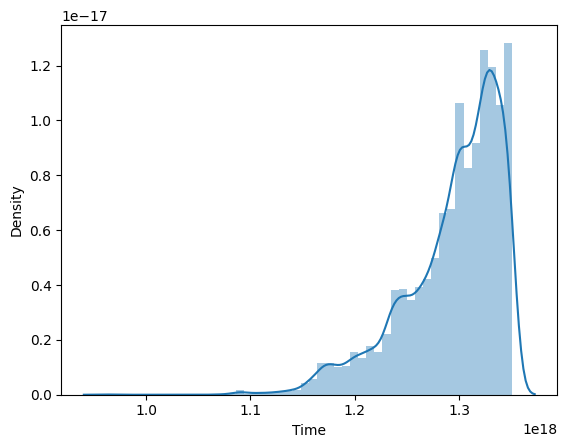

In [17]:
sns.distplot(train_set['Time'],bins = 50)

In [18]:
##highest review by profilenames
profilename = train_set['ProfileName'].value_counts().head(10)
profilename

c2                                            17
Carrie, "Formerly &#34;Sister Carrie&#34;"    13
Gary Peterson                                 12
Chris                                         12
Dan                                           11
Gunner                                        10
John                                          10
Jim                                            9
Rebecca of Amazon "The Rebecca Review"         9
Matthew G. Sherwin                             8
Name: ProfileName, dtype: int64

<AxesSubplot: xlabel='ProfileName'>

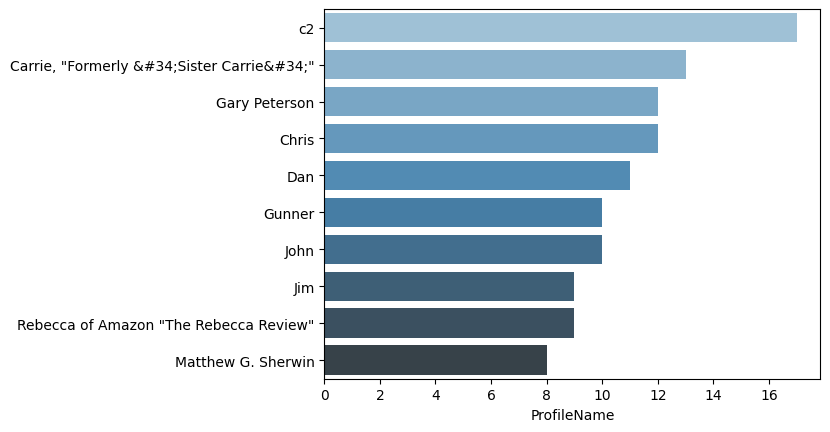

In [19]:
sns.barplot(y=profilename.index,x=profilename,palette='Blues_d')

In [20]:
##highest review cotribution by profile name
profile = train_set.groupby('ProfileName').filter(lambda x : len(x) > 50 )
len(profile)

0

In [21]:
profilegroup = profile.groupby('ProfileName')['Score'].count()
profilegroup

Series([], Name: Score, dtype: int64)

<AxesSubplot: xlabel='Score', ylabel='count'>

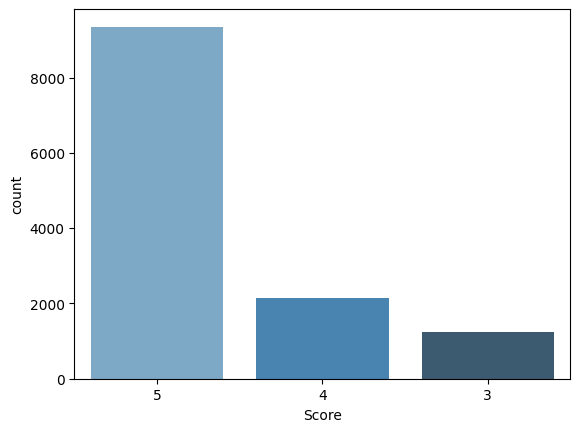

In [22]:
##rating score count
sns.countplot(x='Score',data = train_set,palette='Blues_d',order = train_set['Score'].value_counts().index)


In [23]:
##top10 products got highest reviews
productid = train_set['ProductId'].value_counts().head(10)
print(productid)

B003VXFK44    374
B006N3IG4K    374
B001LG945O    283
B001RVFDOO    281
B0045XE32E    267
B005K4Q1VI    260
B003EML8PM    236
B004391DK0    202
B000G6RYNE    178
B004K30HO2    165
Name: ProductId, dtype: int64


<AxesSubplot: xlabel='ProductId'>

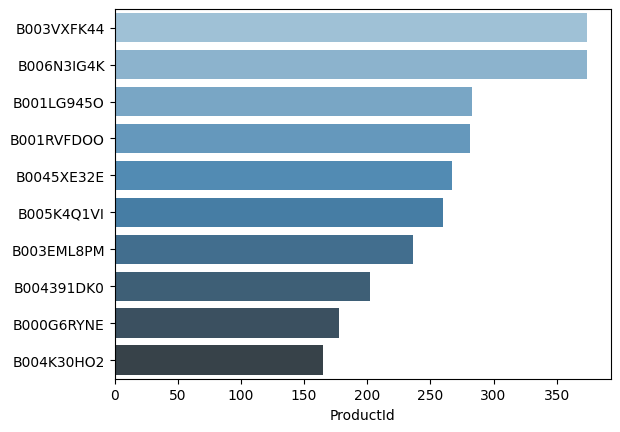

In [24]:
sns.barplot(x=productid, y=productid.index, palette='Blues_d')

In [25]:
##products with highest count
products = train_set.groupby('ProductId').filter(lambda x : len(x) > 300 )
len(products)

748

In [26]:
productsgroup = products.groupby('ProductId').count()
productsgroup

             Id  UserId  ProfileName  HelpfulnessNumerator  \
ProductId                                                    
B003VXFK44  374     374          374                   374   
B006N3IG4K  374     374          374                   374   

            HelpfulnessDenominator  Score  Time  Summary  Text  
ProductId                                                       
B003VXFK44                     374    374   374      374   374  
B006N3IG4K                     374    374   374      374   374  

<AxesSubplot: xlabel='ProductId', ylabel='count'>

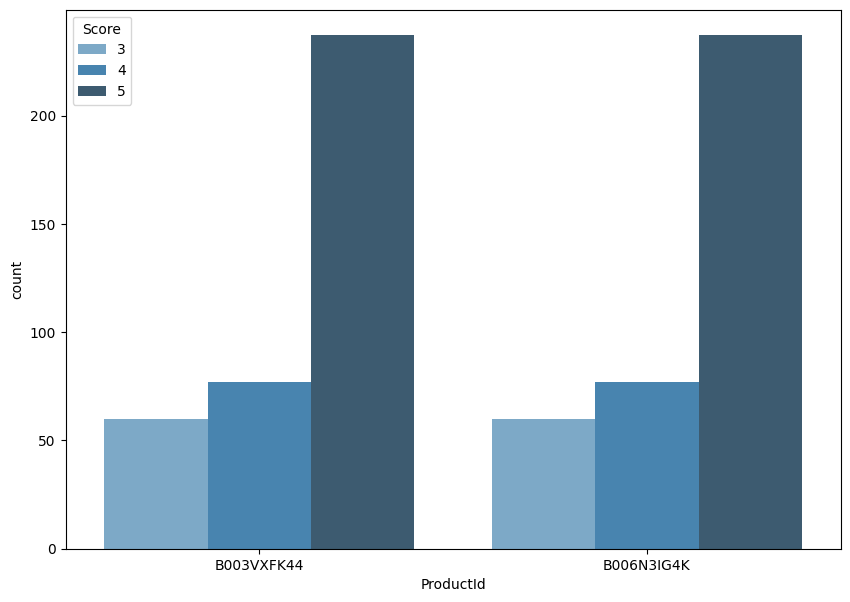

In [27]:
plt.figure(figsize = (10,7))
sns.countplot(x='ProductId',hue = 'Score',data = products,palette='Blues_d')

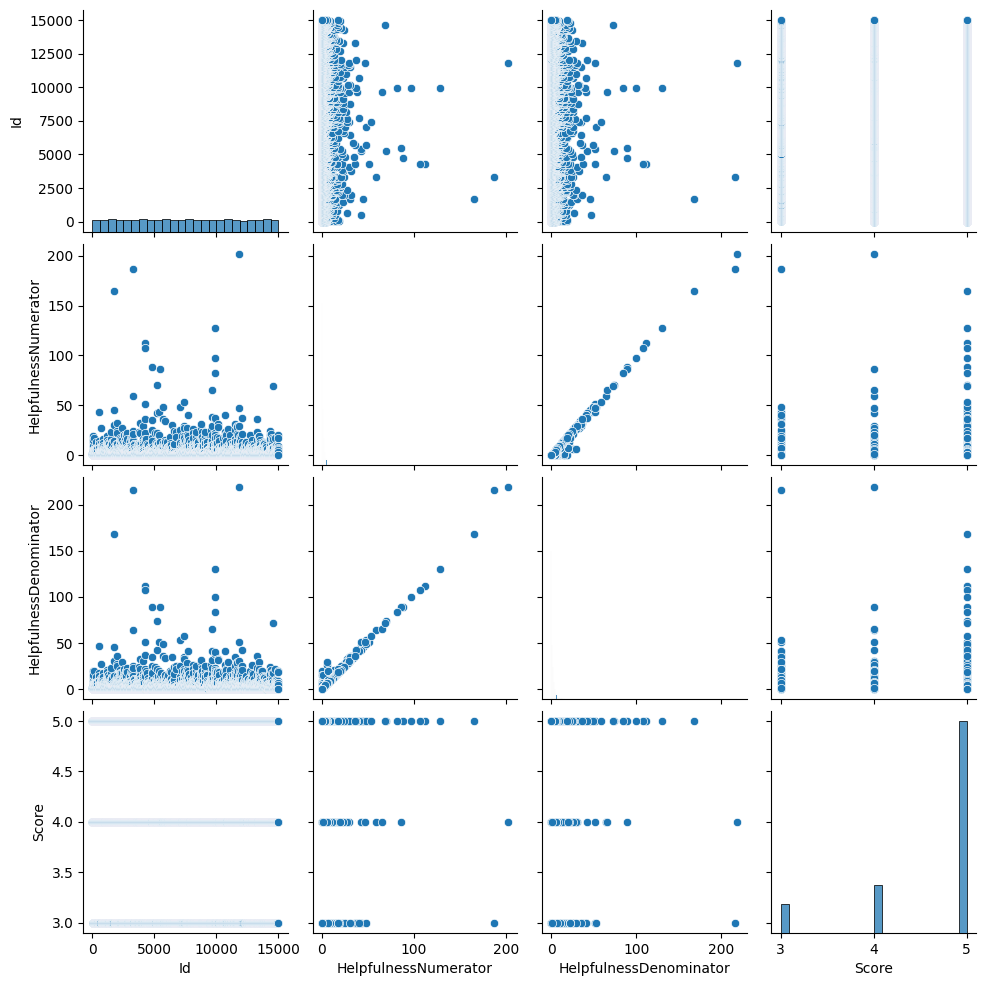

In [28]:
##pairplot
sns.pairplot(train_set)

<AxesSubplot: xlabel='HelpfulnessNumerator', ylabel='HelpfulnessDenominator'>

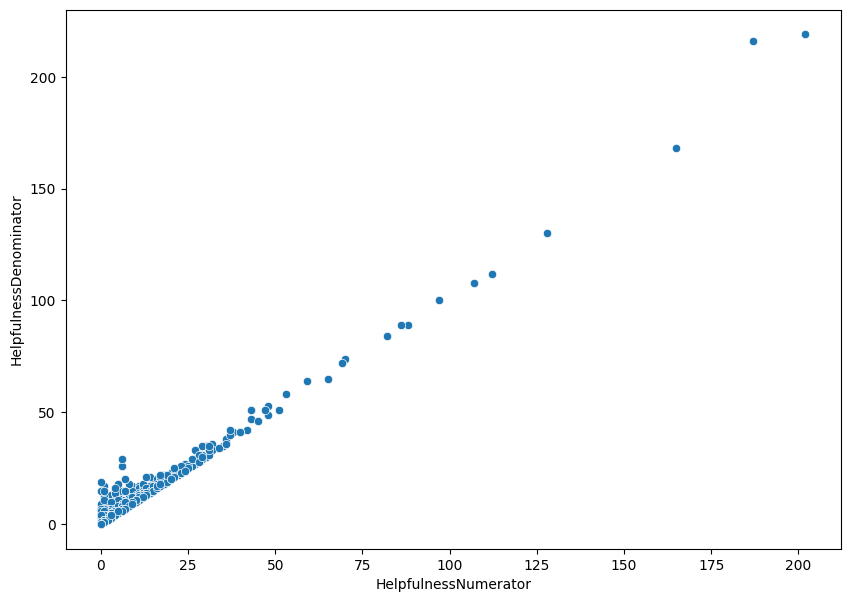

In [29]:
##correlation numerator and denominator
plt.figure(figsize = (10,7))
sns.scatterplot(data=train_set,x='HelpfulnessNumerator',y='HelpfulnessDenominator')

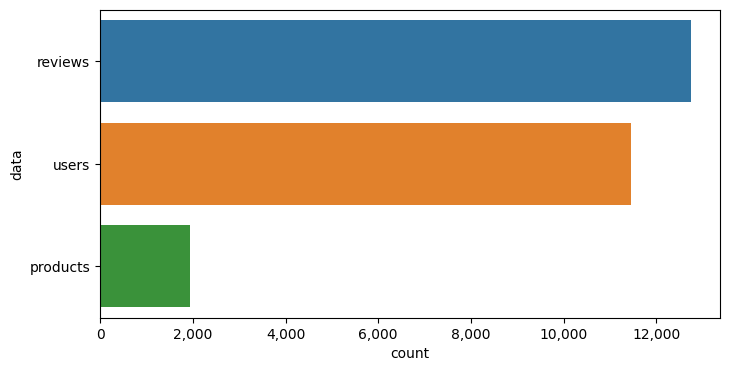

In [30]:
from matplotlib import ticker

numUsers = len(train_set['UserId'].unique())
numProducts = len(train_set['ProductId'].unique())

fig, axes = plt.subplots(1, 1, figsize=(8, 4))
axes.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
sns.barplot(data=pd.DataFrame({
    'data': ['reviews', 'users', 'products'],
    'count': [len(train_set), numUsers, numProducts],
}), x='count', y='data', ax=axes)
plt.show()

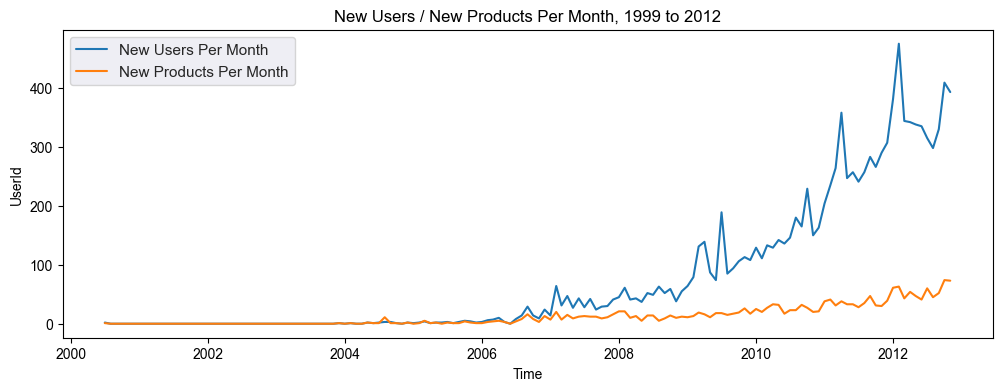

In [31]:
newUsersPerMonth = train_set[['UserId', 'Time']].sort_values(by='Time').drop_duplicates(subset=['UserId']).groupby(pd.Grouper(key='Time', freq='M')).count().reset_index()
newProductsPerMonth = train_set[['ProductId', 'Time']].sort_values(by='Time').drop_duplicates(subset=['ProductId']).groupby(pd.Grouper(key='Time', freq='M')).count().reset_index()

plt.figure(figsize=(12, 4))
plt.title('New Users / New Products Per Month, 1999 to 2012')
sns.set_theme(context='notebook')
sns.lineplot(data=newUsersPerMonth, x='Time', y='UserId', label='New Users Per Month')
ax = sns.lineplot(data=newProductsPerMonth, x='Time', y='ProductId', label='New Products Per Month')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
plt.show()

<AxesSubplot: xlabel='Time', ylabel='Id'>

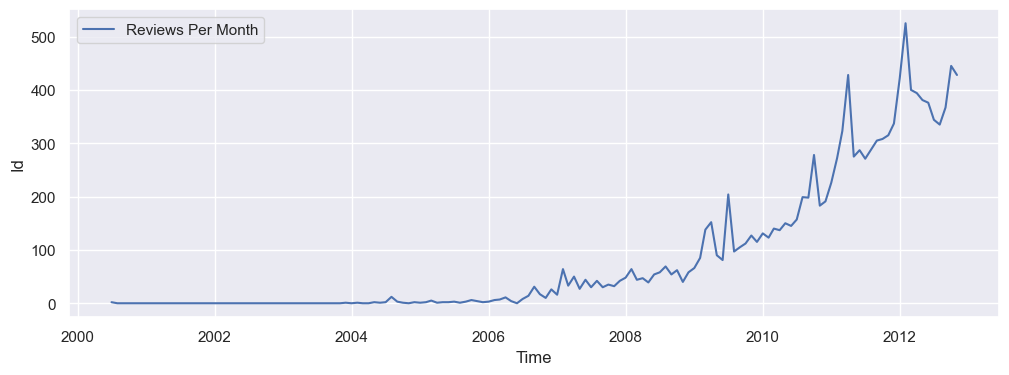

In [32]:
reviewsPerMonth = train_set.groupby(pd.Grouper(key='Time',freq='M')).count().reset_index()

fig, axes = plt.subplots(1, 1, figsize=(12, 4))
axes.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))

sns.lineplot(data=reviewsPerMonth, x='Time', y='Id', label='Reviews Per Month')

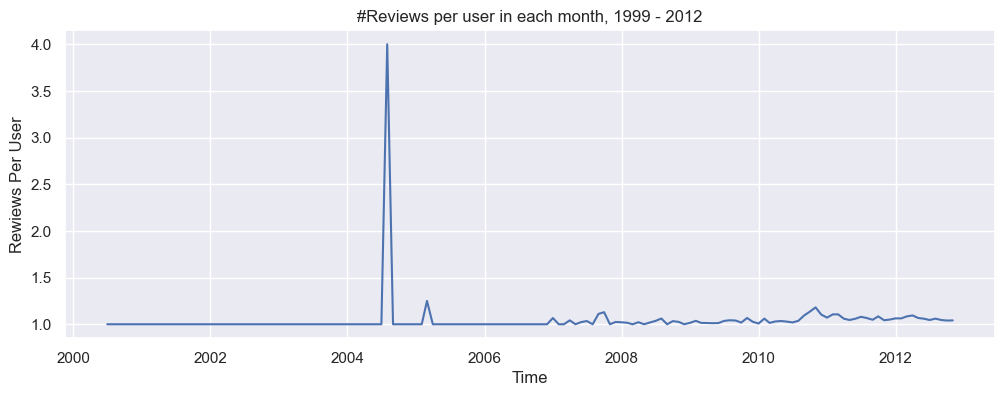

In [33]:
# Reviews per user over time
data = train_set[['Time', 'Id', 'UserId']].groupby(by=[
    pd.Grouper(key='Time', freq='M'),
    'UserId',
]).count()
data['UserId_1'] = 1
data = data.reset_index().groupby(by=pd.Grouper(key='Time', freq='M')).sum()
data['Rewiews_Per_User'] = data['Id'] / data['UserId_1']
data = data.reset_index().dropna()

plt.figure(figsize=(12, 4))
plt.title('#Reviews per user in each month, 1999 - 2012')
ax = sns.lineplot(data=data, x='Time' , y='Rewiews_Per_User')
ax.set(ylabel='Rewiews Per User')
plt.show()

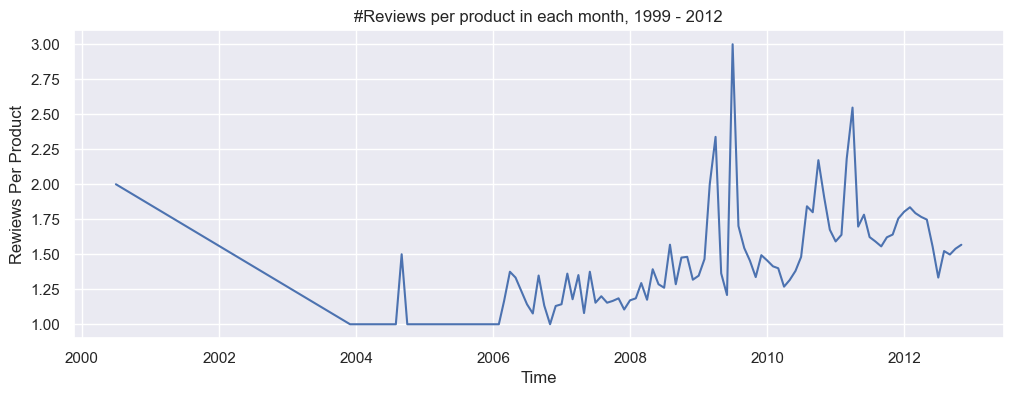

In [34]:
##Reviews per product over time
data = train_set[['Time', 'Id', 'ProductId']].groupby(by=[
    pd.Grouper(key='Time', freq='M'),
    'ProductId',
]).count()
data['ProductId_1'] = 1
data = data.reset_index().groupby(by=pd.Grouper(key='Time', freq='M')).sum()
data['Rewiews_Per_Product'] = data['Id'] / data['ProductId_1']
data = data.reset_index().dropna()

plt.figure(figsize=(12, 4))
plt.title('#Reviews per product in each month, 1999 - 2012')
ax = sns.lineplot(data=data, x='Time' , y='Rewiews_Per_Product')
ax.set(ylabel='Rewiews Per Product')
plt.show()

<AxesSubplot: xlabel='Time', ylabel='Score'>

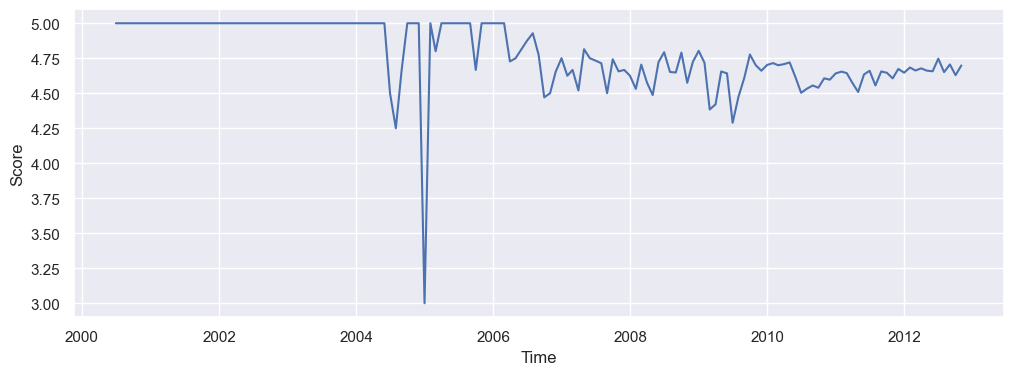

In [35]:
data = train_set.groupby(pd.Grouper(key='Time',freq='M')).mean().reset_index()
fig, axes = plt.subplots(1, 1, figsize=(12, 4))
sns.lineplot(data=data, x='Time', y='Score')

In [36]:
print(train_set.corr())


                              Id  HelpfulnessNumerator  \
Id                      1.000000             -0.003037   
HelpfulnessNumerator   -0.003037              1.000000   
HelpfulnessDenominator  0.001344              0.986034   
Score                  -0.008282              0.001466   

                        HelpfulnessDenominator     Score  
Id                                    0.001344 -0.008282  
HelpfulnessNumerator                  0.986034  0.001466  
HelpfulnessDenominator                1.000000 -0.026292  
Score                                -0.026292  1.000000  


<AxesSubplot: >

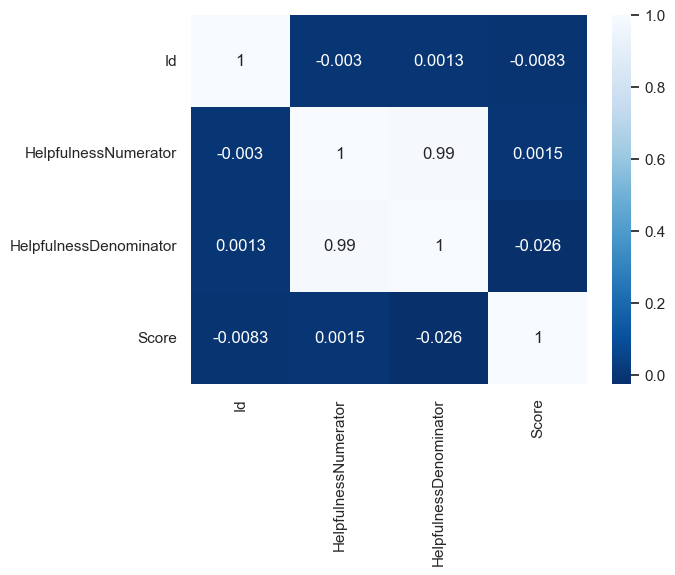

In [37]:
sns.heatmap(train_set.corr(),annot = True,cmap='Blues_r')


Bring in packages to get rid of Stopwords. This helps get rid of junk words that aren't meaningful

In [38]:
from nltk.corpus import stopwords
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger') 
import string
from nltk import word_tokenize, pos_tag

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shrey\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\shrey\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


Loop to strip out nouns

In [39]:
def nouns(text):
    '''Given a string of text, tokenize the text and pull out only the nouns.'''
    is_noun = lambda pos: pos[:2] == 'NN'
    tokenized = word_tokenize(text)
    all_nouns = [word for (word, pos) in pos_tag(tokenized) if is_noun(pos)] 
    return ' '.join(all_nouns)

Now use the loop to strip out nouns from the Text column

In [40]:
data_nouns = pd.DataFrame(train_set.Text.apply(nouns))

In [41]:
print(data_nouns)

                                                    Text
0      Vitality food products quality product stew me...
2      confection centuries citrus gelatin nuts case ...
4      Great taffy price assortment yummy taffy Deliv...
5      hair taffy pound bag taffy flavors watermelon ...
6      saltwater taffy flavors candy None candies ver...
...                                                  ...
14994  product dishes rice mix daughter receipe recip...
14995  Rice Select Whole Wheat Orzo grocery store Ama...
14996  QFC grocery store place Amazon price package. ...
14997  Hard wheat orzo supermarket Amazon Tasty soup ...
14998       product orzo packaging jar storage measuring

[12734 rows x 1 columns]


Add Stop Words to remove words that aren't useful to analysis but common

In [42]:
from sklearn.feature_extraction import text
# Re-add the additional stop words since we are recreating the document-term matrix
add_stop_words = ['like', 'im', 'know', 'just', 'dont', 'thats', 'right', 'people',
                  'youre', 'got', 'gonna', 'time', 'think', 'yeah', 'said','br']
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)


In [43]:
from sklearn.feature_extraction.text import CountVectorizer
stop_words = list(stop_words)
cv = CountVectorizer(stop_words=stop_words)

Turn Data Set Into A Matrix To Look Into Reviews (you will see in the last line we are only looking at the Text field)

In [44]:
from sklearn.feature_extraction.text import CountVectorizer
data_cv = cv.fit_transform(data_nouns.Text.tolist())
data_cv = cv.fit_transform(data_nouns.Text)



In [45]:
print(data_cv)

  (0, 13842)	1
  (0, 5273)	1
  (0, 10193)	1
  (0, 10400)	1
  (0, 10189)	2
  (0, 12363)	1
  (0, 8106)	1
  (0, 7335)	1
  (1, 3136)	1
  (1, 2443)	1
  (1, 2785)	1
  (1, 5576)	1
  (1, 8973)	1
  (1, 2339)	1
  (1, 5053)	1
  (1, 12228)	1
  (1, 12562)	1
  (1, 8593)	1
  (1, 6271)	1
  (1, 13359)	2
  (1, 12425)	1
  (1, 7508)	1
  (1, 7582)	1
  (1, 14202)	2
  (1, 13946)	1
  :	:
  (12731, 8489)	1
  (12731, 10609)	1
  (12731, 14083)	1
  (12731, 3022)	1
  (12731, 10386)	1
  (12731, 9450)	2
  (12732, 8106)	1
  (12732, 422)	1
  (12732, 12614)	1
  (12732, 6755)	1
  (12732, 4088)	1
  (12732, 6164)	1
  (12732, 14083)	1
  (12732, 12046)	1
  (12732, 11179)	1
  (12732, 13713)	1
  (12732, 12856)	1
  (12732, 11387)	1
  (12732, 9206)	1
  (12733, 10189)	1
  (12733, 12416)	1
  (12733, 9297)	1
  (12733, 6950)	1
  (12733, 8105)	1
  (12733, 9206)	1


In [60]:
data_dtmn = pd.DataFrame(data_cv.toarray(),columns=cv.get_feature_names_out())
data_dtmn.index = data_nouns.index

In [61]:
from gensim.corpora import Dictionary


id2wordn = Dictionary(data_dtmn.T.to_dict().values())

In [47]:
print(data_dtmn)

       02  0825305845  0836194942  09  0939165422  0939165562  0982207786  \
0       0           0           0   0           0           0           0   
2       0           0           0   0           0           0           0   
4       0           0           0   0           0           0           0   
5       0           0           0   0           0           0           0   
6       0           0           0   0           0           0           0   
...    ..         ...         ...  ..         ...         ...         ...   
14994   0           0           0   0           0           0           0   
14995   0           0           0   0           0           0           0   
14996   0           0           0   0           0           0           0   
14997   0           0           0   0           0           0           0   
14998   0           0           0   0           0           0           0   

       0xk6hzpjrkaed855hewp  10  100  ...  zon  zoo  zotz  zucchini  zuccin

In [48]:
# One of the required inputs is a term-document matrix
tdm = data_dtmn.transpose()
print(tdm.head())

            0      2      4      5      6      7      8      9      10     \
02              0      0      0      0      0      0      0      0      0   
0825305845      0      0      0      0      0      0      0      0      0   
0836194942      0      0      0      0      0      0      0      0      0   
09              0      0      0      0      0      0      0      0      0   
0939165422      0      0      0      0      0      0      0      0      0   

            11     ...  14989  14990  14991  14992  14993  14994  14995  \
02              0  ...      0      0      0      0      0      0      0   
0825305845      0  ...      0      0      0      0      0      0      0   
0836194942      0  ...      0      0      0      0      0      0      0   
09              0  ...      0      0      0      0      0      0      0   
0939165422      0  ...      0      0      0      0      0      0      0   

            14996  14997  14998  
02              0      0      0  
0825305845      0 

In [49]:
import scipy
from gensim import matutils

In [50]:
# Create the gensim corpus
corpusn = matutils.Sparse2Corpus(scipy.sparse.csr_matrix(data_dtmn.transpose()))

# Create the vocabulary dictionary
id2wordn = dict((v, k) for k, v in cv.vocabulary_.items())

Get ready to build model

In [51]:
from gensim import matutils, models
import scipy.sparse


In [63]:
ldan = models.LdaModel(corpus=corpusn, num_topics=2, id2word=id2wordn, passes=10)
ldan.print_topics()

[(0,
  '0.020*"treats" + 0.020*"dog" + 0.018*"food" + 0.015*"tea" + 0.013*"dogs" + 0.011*"product" + 0.010*"treat" + 0.009*"taste" + 0.007*"flavor" + 0.006*"ingredients"'),
 (1,
  '0.043*"coffee" + 0.018*"flavor" + 0.016*"amazon" + 0.016*"product" + 0.015*"cup" + 0.014*"taste" + 0.011*"chocolate" + 0.011*"price" + 0.010*"crackers" + 0.009*"box"')]

In [53]:
%%time
# Around 30s for 100topics, 15s for 10 topics
import pyLDAvis
import pyLDAvis.gensim_models



CPU times: total: 125 ms
Wall time: 208 ms


In [54]:
import pyLDAvis


In [68]:
prep_display = pyLDAvis.gensim_models.prepare(ldan, corpusn, id2wordn)


pyLDAvis.display(prep_display)


pyLDAvis.save_html(prep_display, 'lda_output.html')

